# Corporate Prosecution - Exercise Q

#### Summary

Investigate the differences between different states' prosecution of corporate issues.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Source

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [1]:
import pandas as pd 
df = pd.read_csv("cpr-data.csv")
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,...,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN


### Check that your dataframe has 3038 rows and 56 columns.

In [2]:
df.shape

(3038, 56)

### List the columns and their data types

In [3]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- FINE
- TOTAL_PAYMENT
- USAO
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

In [4]:
#PRIMARY_CRIME_CODE: This can include any one of the following: Accounting Fraud, Antitrust, APPS, Bank Secrecy Act, Bribery, Controlled Substances, Environmental.
#DISPOSITION_TYPE: Indicates whether the prosecution was resolved through a type of agreement
#AGREEMENT_TYPE: Indicates whether the agreement is a plea ("plea"), non-prosecution agreement ("NP"), or deferred prosecution agreement ("DP")
#FINE: Amount of fine in U.S. dollars.
#TOTAL_PAYMENT: Sum of all monetary penalties (i.e. fines, restitution, forfeiture, disgorgements, community service, etc.)
#USAO: U.S. Attorney's Offices involved in the prosecution. Multiple entries are separated by a "|".
#AGREEMENT_REQUIRED_NEW_POSITIONS: the agreement stated that new positions be created at a firm, typically related to compliance
#INDEP_MONITOR_REQUIRED: does the agreement require that an independent actor be retained to supervise implementation of a compliance program

# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

## Set pandas to display 60 columns

In [4]:
pd.set_option("display.max_columns", 60)
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,NaN,NaN,0.0,272734.0,12.0,NaN,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,NaN,NaN,24000.0,NaN,36.0,NaN,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0.0,0.0,50.0,0.0,0.0,0.0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,NaN,NaN,14640.0,NaN,36.0,NaN,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,NaN,NaN,25000.0,NaN,0.0,2500.0,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN


## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [5]:
df.head(100)

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,NaN,NaN,0.0,272734.0,12.0,NaN,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,NaN,NaN,24000.0,NaN,36.0,NaN,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0.0,0.0,50.0,0.0,0.0,0.0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,NaN,NaN,14640.0,NaN,36.0,NaN,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,NaN,NaN,25000.0,NaN,0.0,2500.0,27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,PACER,NaN
5,823,4628 Group Inc.,plea,Environmental,NaN,New York - Northern District,United States,No,USA v. 4628 Group Inc.,5:00-cr-00441,8,2001-07-31,2001-07-31,2000-09-20,NaN,No,0.0,NaN,500000.0,0.0,24.0,0.0,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.0,PACER,NaN
6,824,"70 North, LLC",plea,Environmental,NaN,Alaska,United States,No,USA v. 70 North LLC,4:13-po-00001,NaN,2013-03-05,2013-03-05,NaN,NaN,No,35.0,0.0,2000.0,0.0,0.0,0.0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,PACER,NaN
7,825,806 Trading Corp.,plea,Other,NaN,New Jersey,United States,No,USA v. 806 TRADING CORPORATION,2:11-cr-00579,8,2012-03-05,2012-03-05,2011-09-06,NaN,No,0.0,0.0,42000.0,0.0,0.0,0.0,42000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,PACER,NaN
8,2530,"83rd & Union

## Describe the REGULATORY_FINE column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [6]:
df['REGULATORY_FINE'].describe()

count    1.470000e+02
mean     4.905565e+07
std      1.405663e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+06
75%      2.345000e+07
max      1.000000e+09
Name: REGULATORY_FINE, dtype: float64

### Oh that's ugly ugly ugly. Set pandas to format floats with ZERO decimal points. And tell it to use a `,` in the thousands position.

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [7]:
pd.set_option("display.float_format", "{:,.2f}".format)
df['REGULATORY_FINE'].describe()

count             147.00
mean       49,055,647.20
std       140,566,295.16
min                 0.00
25%                 0.00
50%         2,000,000.00
75%        23,450,000.00
max     1,000,000,000.00
Name: REGULATORY_FINE, dtype: float64

## Look at the total payments for the first two rows. Pretty nice!

In [8]:
df['TOTAL_PAYMENT'].head(2)

0    272734
1     24000
Name: TOTAL_PAYMENT, dtype: int64

# A little summarizing

## What were the most popular crimes?

In [9]:
df['CRIME_DESC'].value_counts()

Tax fraud                                                                                                                                                52
FCPA                                                                                                                                                     44
Securities Fraud                                                                                                                                          8
Anti-Kickback Law                                                                                                                                         7
Antitrust violations                                                                                                                                      7
Mail fraud                                                                                                                                                5
Food, Drug and Cosmetic Act                                     

### Graph the previous answer, with the longest bar on top

In [10]:
%matplotlib inline

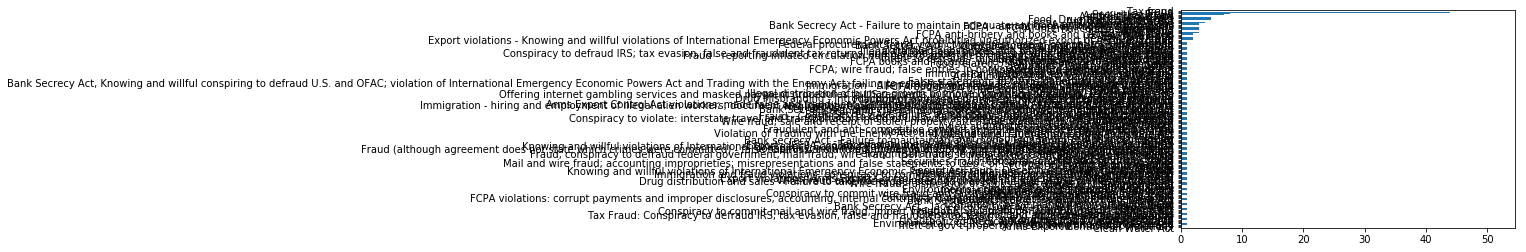

In [11]:
df['CRIME_DESC'].value_counts().sort_values(ascending = True).plot(kind='barh')

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, primary crime code, US Attorney's Office and total payment.

In [12]:
new_df = df[['COMPANY', 'DISPOSITION_TYPE', 'PRIMARY_CRIME_CODE', 'USAO', 'TOTAL_PAYMENT']].copy()
new_df.head()

,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,USAO,TOTAL_PAYMENT
0,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,Virginia - Eastern District,272734
1,"3D Poultry Loading, Inc.",plea,Immigration,Arkansas - Western District,24000
2,"3rd & Bell, LLC",plea,Immigration,Arizona,50
3,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,Georgia - Northern District,14640
4,"45,000, Inc.",plea,Environmental,Louisiana - Middle District,27500


## Confirm it has 3038 rows and 5 columns

In [13]:
new_df.shape

(3038, 5)

## Using this subset, try to extract the state name of the US Attorney's Office into a separate column called `state`

Your machine will complain. **Let's talk about that error.**

In [14]:
state = new_df['USAO'].str.extract("(^[^-]*)")
state

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0                         Virginia 
1                         Arkansas 
2                           Arizona
3                          Georgia 
4                        Louisiana 
5                         New York 
6                            Alaska
7                        New Jersey
8                           Arizona
9                           Arizona
10                        Virginia 
11                        Virginia 
12                       Louisiana 
13                        New York 
14                           Kansas
15                     Mississippi 
16                           Oregon
17                         Florida 
18                      California 
19                       Louisiana 
20                          Vermont
21                        New York 
22                        New York 
23                           USDOJ 
24                           USDOJ 
25                           USDOJ 
26                           USDOJ 
27                          

## Look at the first 25 states.

Confirm they match the following. If they don't, improve your technique from above.

    0        Virginia
    1        Arkansas
    2         Arizona
    3         Georgia
    4       Louisiana
    5        New York
    6          Alaska
    7      New Jersey
    8         Arizona
    9         Arizona
    10       Virginia
    11       Virginia
    12      Louisiana
    13       New York
    14         Kansas
    15    Mississippi
    16         Oregon
    17        Florida
    18     California
    19      Louisiana
    20        Vermont
    21       New York
    22       New York
    23          USDOJ
    24          USDO

In [ ]:
new_df['STATE'].value_counts()

## Hmm, maybe you should clean that up a little more and try again.

In [16]:
state = new_df[new_df['STATE'].str.contains("USDOJ") == False]
state

,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,USAO,TOTAL_PAYMENT,STATE
0,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,Virginia - Eastern District,272734,Virginia
1,"3D Poultry Loading, Inc.",plea,Immigration,Arkansas - Western District,24000,Arkansas
2,"3rd & Bell, LLC",plea,Immigration,Arizona,50,Arizona
3,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,Georgia - Northern District,14640,Georgia
4,"45,000, Inc.",plea,Environmental,Louisiana - Middle District,27500,Louisiana
5,4628 Group Inc.,plea,Environmental,New York - Northern District,500000,New York
6,"70 North, LLC",plea,Environmental,Alaska,2000,Alaska
7,806 Trading Corp.,plea,Other,New Jersey,42000,New Jersey
8,"83rd & Union Hills, LLC",plea,Immigration,Arizona,50,Arizona
9,"84th & Bell, LLC",plea,Immigration,Arizona,50,Arizona


## Which state has had the most total cases?

In [18]:
state['STATE'].value_counts()

Florida                                220
California                             215
New York                               179
Texas                                  124
Louisiana                              112
Ohio                                   109
Pennsylvania                           105
Missouri                                96
Virginia                                93
Illinois                                74
New Jersey                              72
North Carolina                          68
Massachusetts                           57
Georgia                                 57
Connecticut                             53
Michigan                                45
Kentucky                                39
Washington                              38
Tennessee                               34
District of Columbia                    34
Arizona                                 32
Maryland                                30
South Carolina                          30
Wisconsin  

## Which state has had the most total fines?

In [19]:
state.groupby('STATE')['TOTAL_PAYMENT'].sum()

STATE
Alabama                                  114555399
Alaska                                    39968216
Alaska,Montana                              750000
Arizona                                    8150037
Arizona,California                         2290000
Arkansas                                   3071778
California                              1153522038
Colorado                                   8423944
Colorado,Texas                               75000
Connecticut                             1474660683
Delaware                                  70622580
District of Columbia                     231225794
District of Columbia,New York            641000000
Florida                                 1809225843
Georgia                                  484094806
Guam & the Northern Mariana Islands        3050969
Hawaii                                     2732863
Hawaii                                      275000
Idaho                                      7727312
Illinois                 

## Show me both the count AND the sum in the same dataframe

- Tip: There's a quick way to do this if you'd like

## Graph that, but only for "real" states

Here's a list of state names, if you'd like:

    ['Alaska', 'Alabama', 'Arkansas', 'American Samoa', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana', 'National', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']

## What are the states that have so many prosecutions but so little money?

# Make another comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."